# Dataset Load

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
data=pd.read_csv('Obesity.csv')

In [4]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [6]:
data.head(6)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


In [7]:
data.tail(6)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2105,Female,21.285965,1.726920,131.335786,yes,yes,3.0,3.0,Sometimes,no,1.796267,no,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
data.shape

(2111, 17)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [10]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


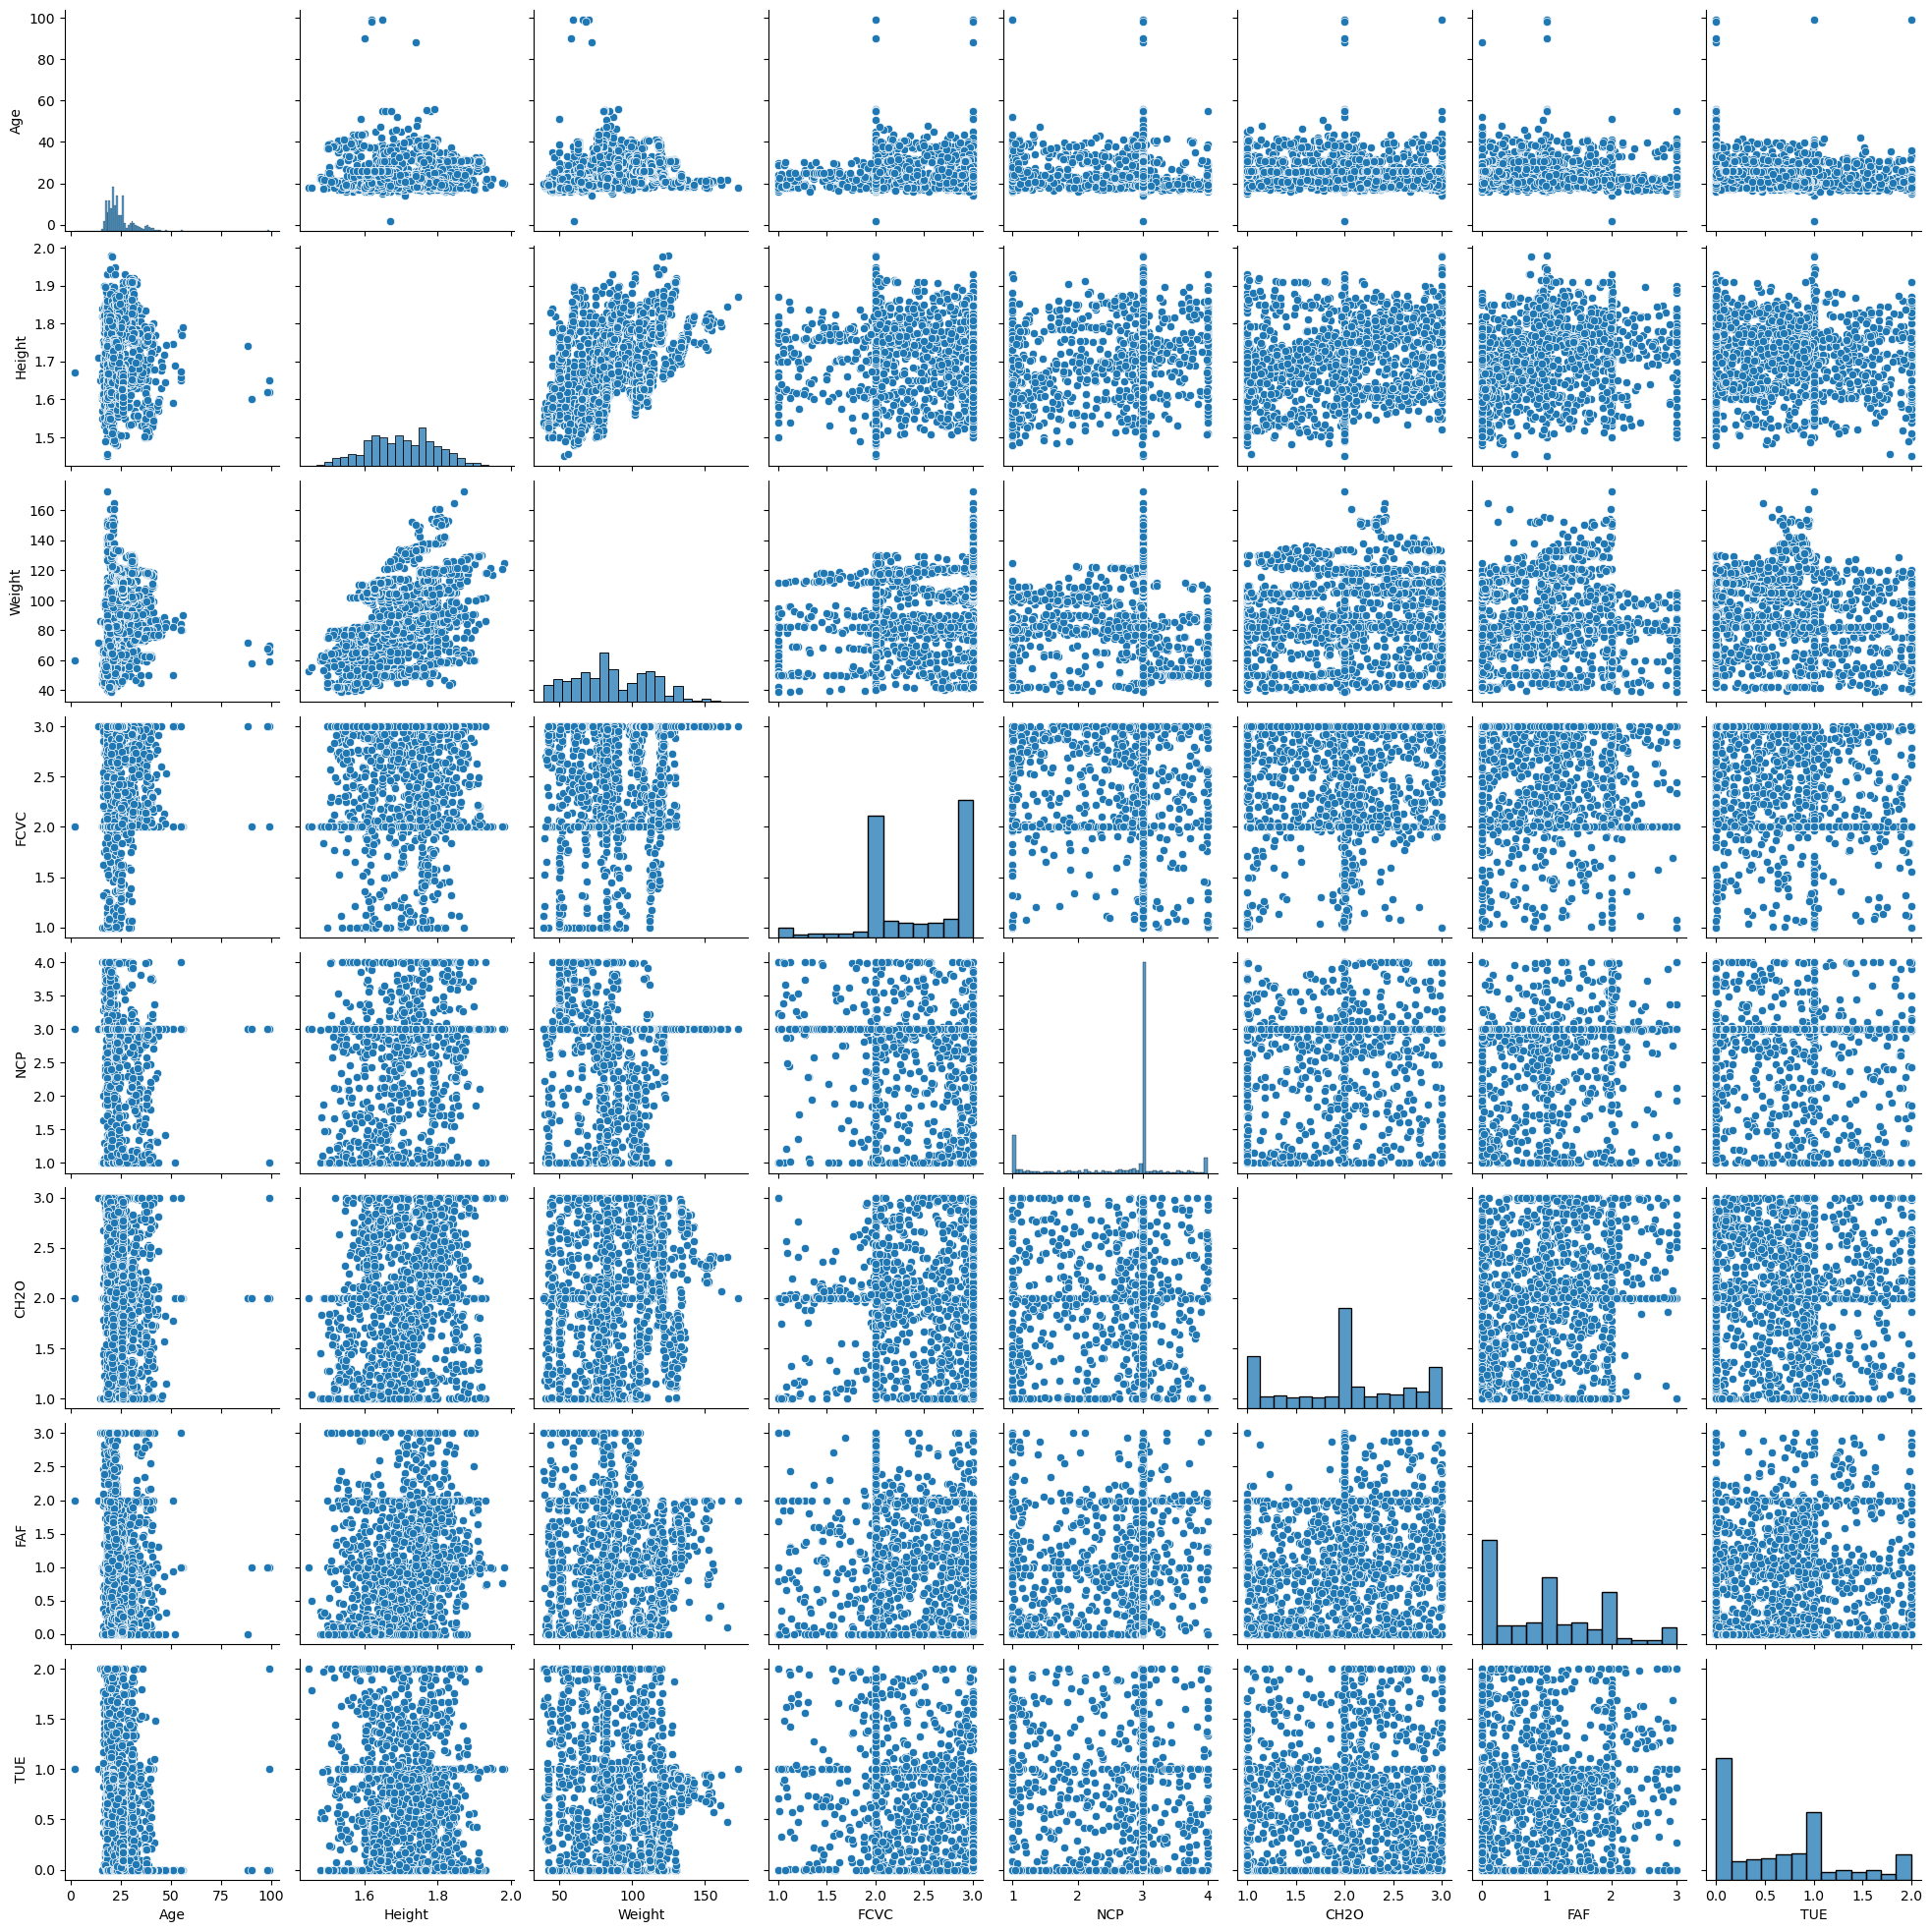

In [11]:
sns.pairplot(data)

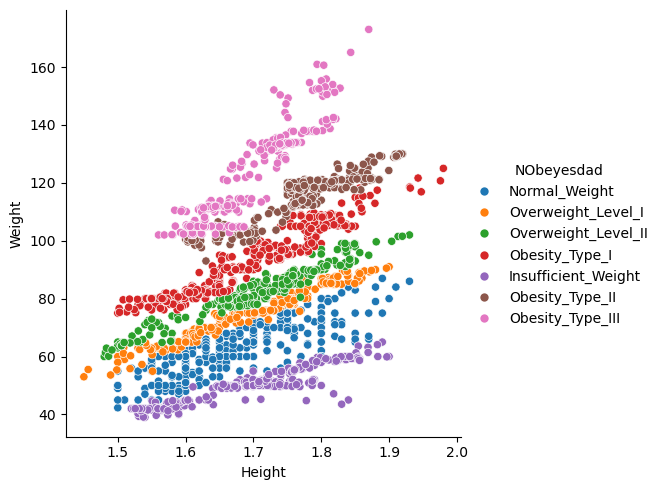

In [12]:
sns.relplot( data=data, x='Height',y='Weight' ,hue='NObeyesdad')

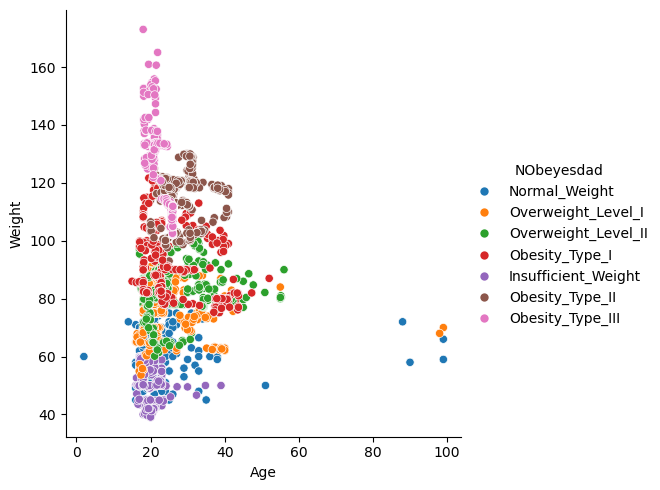

In [13]:
sns.relplot( data=data, x='Age',y='Weight' ,hue='NObeyesdad')

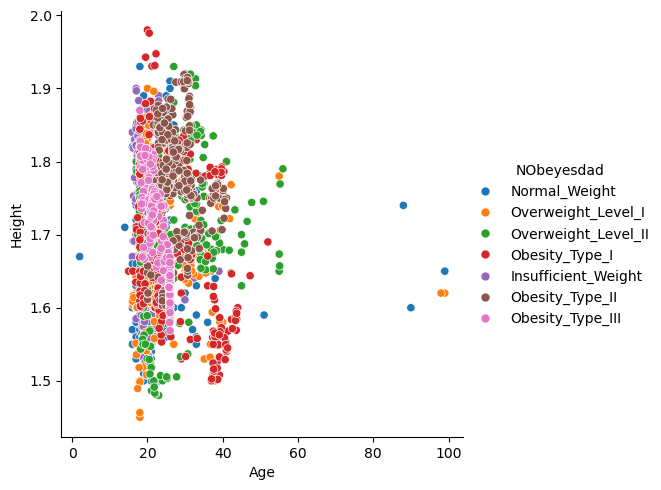

In [14]:
sns.relplot( data=data, x='Age',y='Height' ,hue='NObeyesdad')

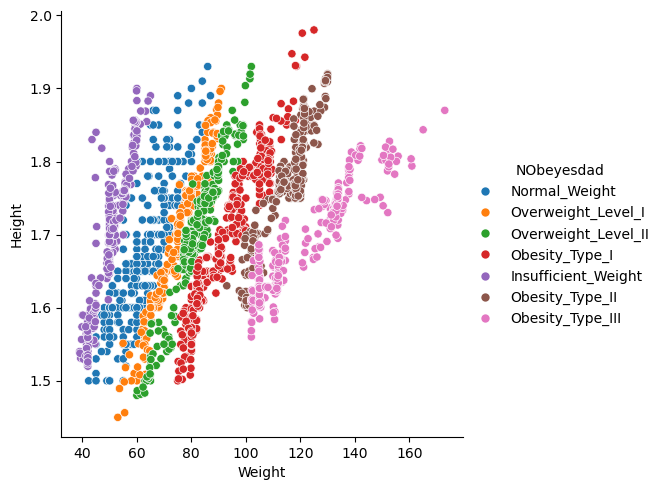

In [15]:
sns.relplot( data=data, x='Weight',y='Height' ,hue='NObeyesdad')

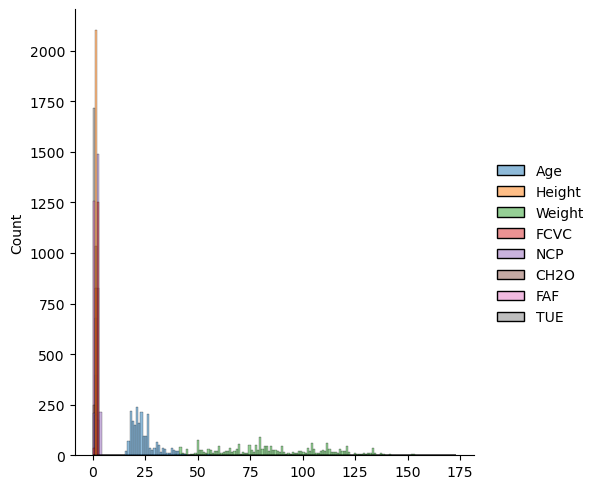

In [16]:
sns.displot(data=data)

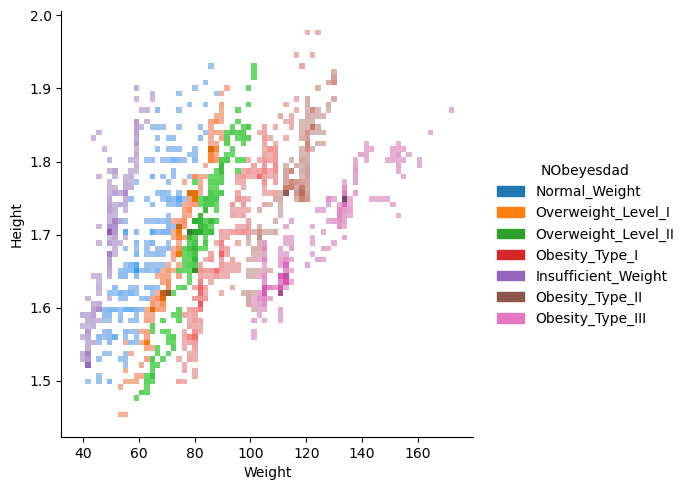

In [106]:
sns.displot(data=data, x='Weight', y='Height', hue='NObeyesdad', bins=70,)

# Data cleaning

In [19]:
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [20]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [21]:
null_column=(['Gender', 'Height', 'family_history_with_overweight','CAEC', 'SCC','MTRANS'])

In [22]:
num=data.select_dtypes(include='number')
cat= data.select_dtypes(include='object')

In [23]:
num

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


            Age    Height      Weight  FCVC  NCP      CH2O       FAF       TUE
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000  1.000000
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000  0.000000
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000  1.000000
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000  0.000000
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000  0.000000
...         ...       ...         ...   ...  ...       ...       ...       ...
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269  0.906247
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390  0.599270
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209  0.646288
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107  0.586035
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452  0.714137

[2111 rows x 8 columns]


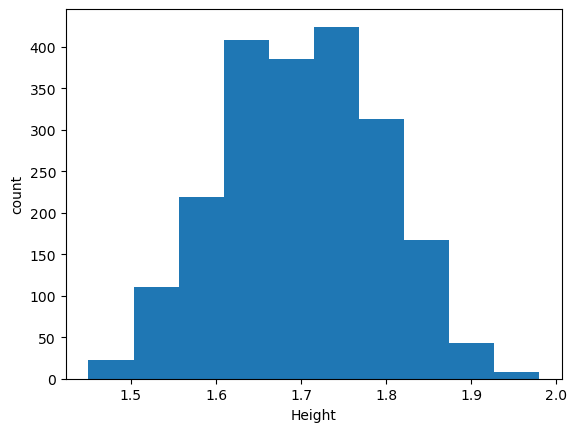

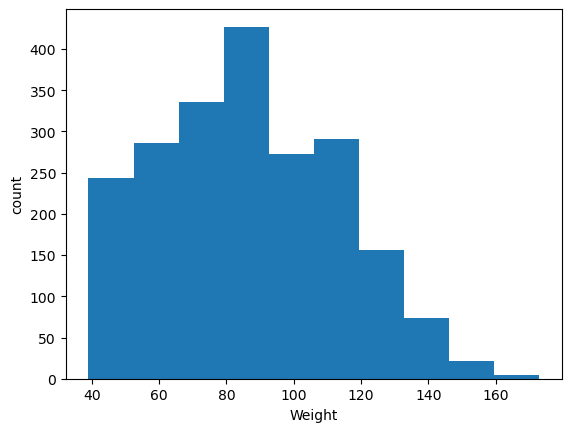

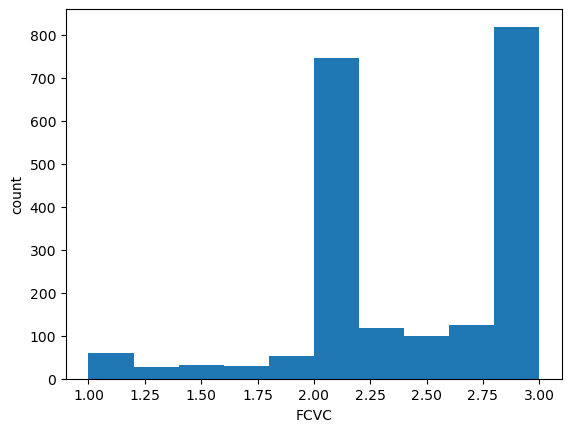

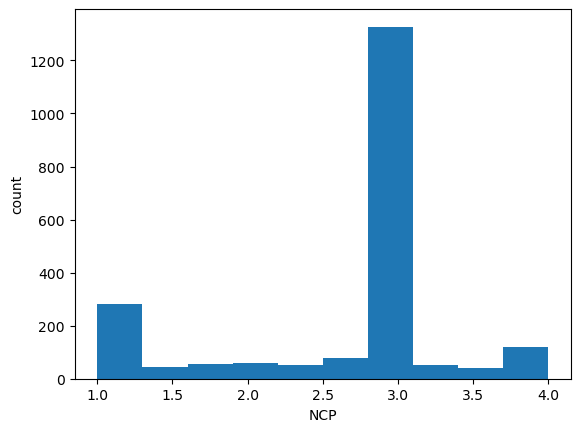

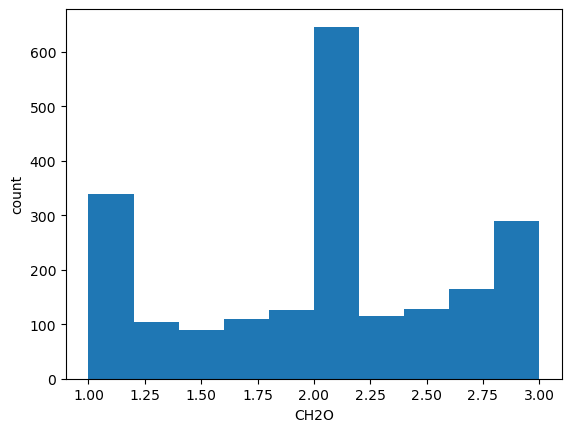

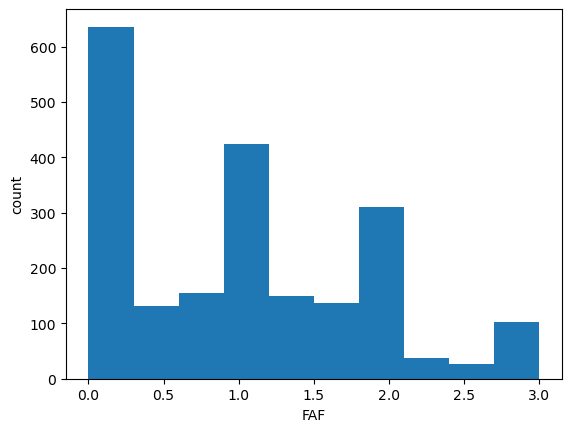

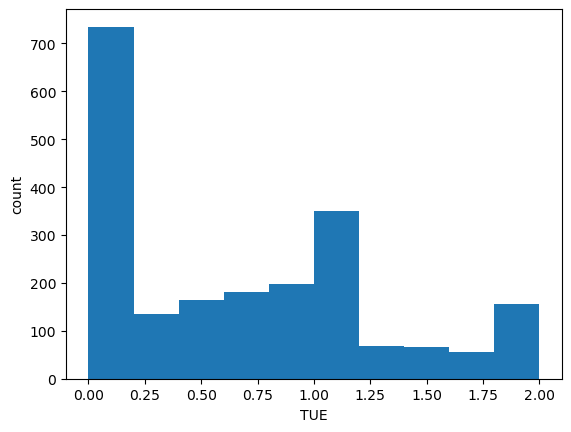

In [24]:
num_cols=num.columns.tolist()[1:]
print(num)
for col in num_cols:
    plt.hist(num[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [25]:
for col in num_cols:
    num[col]=num[col].fillna(data[col].median())

In [26]:
num.isna().sum()

Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64

# Finding Outliers

<Axes: >

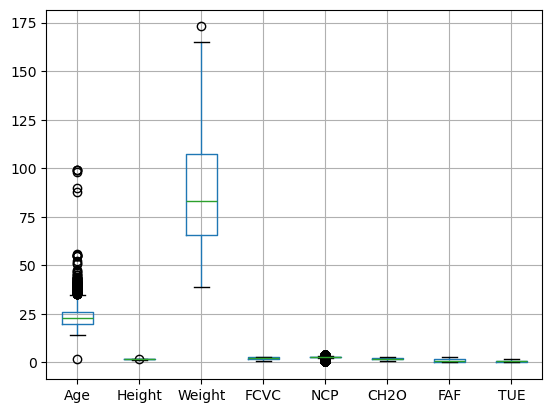

In [28]:
data.boxplot()

In [29]:
def replace_outliers_with_upper_bound(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data[column_name] = data[column_name].clip(upper=upper_bound)
    data[column_name] = data[column_name].clip(lower=lower_bound)
    return data[column_name]

In [30]:
for col in num_cols:
    num[col]=replace_outliers_with_upper_bound(num,col)
    

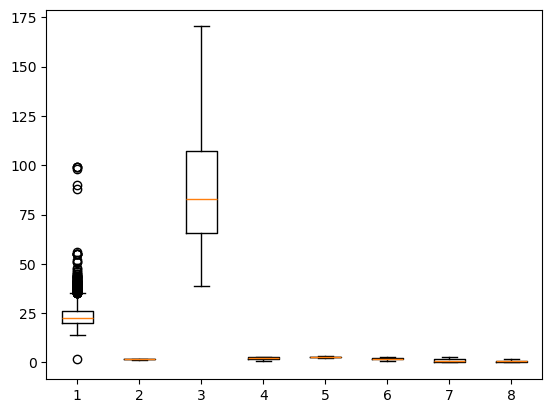

In [31]:
plt.boxplot(num)
plt.show()

# Encoding the categorical value

In [33]:
# Here LabelEncoder is used for encoding
for col in cat:
    encoder=LabelEncoder()
    cat[col]=encoder.fit_transform(cat[col])

In [34]:
Final_data=pd.concat([num,cat] ,axis=1)

In [35]:
Final_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.000000,2.000000,0.000000,1.000000,0,1,0,2,0,0,3,3,1
1,21.000000,1.520000,56.000000,3.0,3.000000,3.000000,3.000000,0.000000,0,1,0,2,1,1,2,3,1
2,23.000000,1.800000,77.000000,2.0,3.000000,2.000000,2.000000,1.000000,1,1,0,2,0,0,1,3,1
3,27.000000,1.800000,87.000000,3.0,3.000000,2.000000,2.000000,0.000000,1,0,0,2,0,0,1,4,5
4,22.000000,1.780000,89.800000,2.0,2.146845,2.000000,0.000000,0.000000,1,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.000000,1.728139,1.676269,0.906247,0,1,1,2,0,0,2,3,4
2107,21.982942,1.748584,133.742943,3.0,3.000000,2.005130,1.341390,0.599270,0,1,1,2,0,0,2,3,4
2108,22.524036,1.752206,133.689352,3.0,3.000000,2.054193,1.414209,0.646288,0,1,1,2,0,0,2,3,4
2109,24.361936,1.739450,133.346641,3.0,3.000000,2.852339,1.139107,0.586035,0,1,1,2,0,0,2,3,4


In [36]:
# Scaling using MinMaxScaler

In [37]:
for col in num_cols:
    Final_data[col]=(Final_data[col]-Final_data[col].min())/(Final_data[col].max()-Final_data[col].min())

In [38]:
Final_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,21.000000,0.323096,0.190307,0.5,0.625,0.500000,0.000000,0.500000,0,1,0,2,0,0,3,3,1
1,21.000000,0.133039,0.129409,1.0,0.625,1.000000,1.000000,0.000000,0,1,0,2,1,1,2,3,1
2,23.000000,0.665197,0.289267,0.5,0.625,0.500000,0.666667,0.500000,1,1,0,2,0,0,1,3,1
3,27.000000,0.665197,0.365389,1.0,0.625,0.500000,0.666667,0.000000,1,0,0,2,0,0,1,4,5
4,22.000000,0.627186,0.386704,0.5,0.000,0.500000,0.000000,0.000000,1,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0.495534,0.703440,1.0,0.625,0.364070,0.558756,0.453124,0,1,1,2,0,0,2,3,4
2107,21.982942,0.567478,0.721210,1.0,0.625,0.502565,0.447130,0.299635,0,1,1,2,0,0,2,3,4
2108,22.524036,0.574361,0.720802,1.0,0.625,0.527097,0.471403,0.323144,0,1,1,2,0,0,2,3,4
2109,24.361936,0.550118,0.718193,1.0,0.625,0.926170,0.379702,0.293017,0,1,1,2,0,0,2,3,4


# Corelation Matrix

<Axes: >

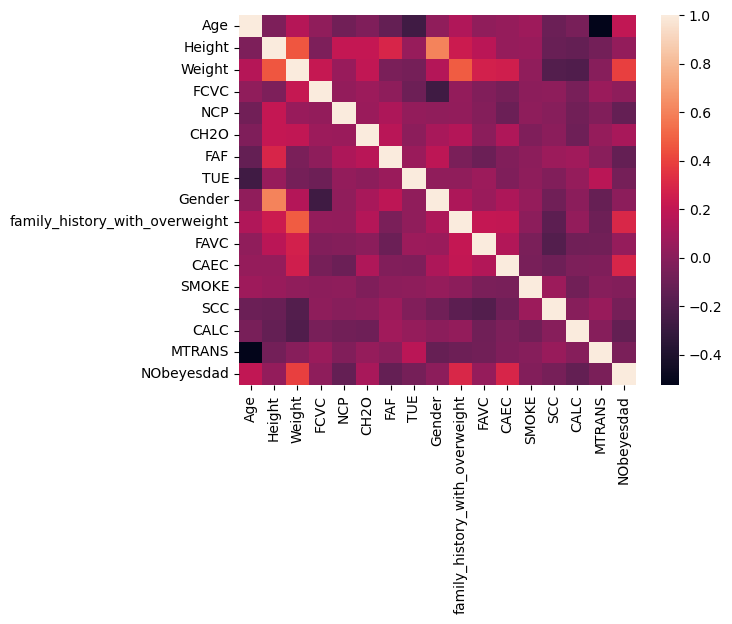

In [116]:
# corelation of the columns to find the relationship between the columns
corelation=Final_data.corr()
sns.heatmap(corelation)

# Training the data 

In [41]:
Final_data.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [42]:
y=Final_data['NObeyesdad']
x=Final_data.drop('NObeyesdad', axis=1)

In [43]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int32

In [44]:
x

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,21.000000,0.323096,0.190307,0.5,0.625,0.500000,0.000000,0.500000,0,1,0,2,0,0,3,3
1,21.000000,0.133039,0.129409,1.0,0.625,1.000000,1.000000,0.000000,0,1,0,2,1,1,2,3
2,23.000000,0.665197,0.289267,0.5,0.625,0.500000,0.666667,0.500000,1,1,0,2,0,0,1,3
3,27.000000,0.665197,0.365389,1.0,0.625,0.500000,0.666667,0.000000,1,0,0,2,0,0,1,4
4,22.000000,0.627186,0.386704,0.5,0.000,0.500000,0.000000,0.000000,1,0,0,2,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0.495534,0.703440,1.0,0.625,0.364070,0.558756,0.453124,0,1,1,2,0,0,2,3
2107,21.982942,0.567478,0.721210,1.0,0.625,0.502565,0.447130,0.299635,0,1,1,2,0,0,2,3
2108,22.524036,0.574361,0.720802,1.0,0.625,0.527097,0.471403,0.323144,0,1,1,2,0,0,2,3
2109,24.361936,0.550118,0.718193,1.0,0.625,0.926170,0.379702,0.293017,0,1,1,2,0,0,2,3


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model selection

In [47]:
reg_lin=LinearRegression()
reg_lin.fit(x_train,y_train)
y_pred=reg_lin.predict(x_test)


# Prediction

In [49]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean squared Error:",mse)
print("R-squared:",r2)


Mean squared Error: 2.803777476080844
R-squared: 0.240821802108803
